## DLC Analysis


In [1]:
# Load all the tools
import numpy as np

from weis.aeroelasticse import FileTools

import pandas as pd


import matplotlib.pyplot as plt

import openmdao.api as om

import matplotlib
# font = {
# #         'family' : 'normal',
# #         'weight' : 'bold',
#         'size'   : 14
#        }

# matplotlib.rc('font', **font)

import ruamel_yaml as ry



/Users/dzalkind/opt/anaconda3/envs/weis-env4/lib/python3.8/site-packages/openmdao/utils/general_utils.py:121: OMDeprecationWarning:simple_warning is deprecated.  Use openmdao.warnings.issue_warning instead.
/Users/dzalkind/opt/anaconda3/envs/weis-env4/lib/python3.8/site-packages/openmdao/utils/notebook_utils.py:154: UserWarning:Tabulate is not installed. Run `pip install openmdao[notebooks]` to install required dependencies. Using ASCII for outputs.


Timeseries plotting function

In [2]:
def plot_tss(dfs,channels):

    fig, axs = plt.subplots(len(channels),1)
    fig.set_size_inches(12,2*len(channels))

    if len(channels) == 1:
        axs = [axs]

    axs = axs.flatten()
    
    for df in dfs:

        for i_chan, chan in enumerate(channels):
            axs[i_chan].plot(df.Time,df[chan])
            axs[i_chan].set_ylabel(chan)
            axs[i_chan].grid()

        axs[-1].set_xlabel('Time')
        
    [a.set_xticklabels('') for a in axs[:-1]]
    [a.grid(True) for a in axs]
        
    fig.patch.set_facecolor('white')
    fig.align_ylabels()

    
    return fig, axs

# Case Info

In [3]:

# Function for reading case matrix
def read_cm(fname_case_matrix):
    cm_dict = FileTools.load_yaml(fname_case_matrix, package=1)
    cnames = []
    for c in list(cm_dict.keys()):
        if isinstance(c,ry.comments.CommentedKeySeq):
            cnames.append(tuple(c))
        else:
            cnames.append(c)

    cm = pd.DataFrame(cm_dict, columns=cnames)

    cm[('DLC','Label')].unique()

    dlc_inds = {}

    for dlc in cm[('DLC','Label')].unique():
        dlc_inds[dlc] = cm[('DLC','Label')] == dlc
        
    return cm, dlc_inds


In [4]:
fname_case_matrix = 'outputs/case_matrix.yaml'


cm, dlc_inds = read_cm(fname_case_matrix)

cm

,"(AeroDyn15, AFAeroMod)","(AeroDyn15, WakeMod)","(DLC, Label)","(DLC, MeanWS)","(DLC, WindSeed)","(ElastoDyn, Azimuth)","(ElastoDyn, BlPitch1)","(ElastoDyn, BlPitch2)","(ElastoDyn, BlPitch3)","(ElastoDyn, NacYaw)",...,"(InflowWind, Filename_Uni)","(InflowWind, PropagationDir)","(InflowWind, RefHt_Uni)","(InflowWind, RefLength)","(InflowWind, WindType)","(ServoDyn, TPitManS1)","(ServoDyn, TPitManS2)","(ServoDyn, TPitManS3)",Case_ID,Case_Name
0,2,1,1.1,16.0,1501552846,0,15.0,15.0,15.0,0.0,...,/Users/dzalkind/Tools/WEIS-1/examples/02_contr...,0.0,148.73499999999999,241.94,3,9999,9999,9999,0,IEA15_0
1,1,0,6.1,46.789,488200390,0,90.0,90.0,90.0,-8.0,...,/Users/dzalkind/Tools/WEIS-1/examples/02_contr...,0.0,148.73499999999999,241.94,3,0,0,0,1,IEA15_1
2,1,0,6.1,46.789,1693606511,0,90.0,90.0,90.0,8.0,...,/Users/dzalkind/Tools/WEIS-1/examples/02_contr...,0.0,148.73499999999999,241.94,3,0,0,0,2,IEA15_2


Get indices for of each DLC in case matrix (need WEIS develop)

In [5]:
cm[('DLC','Label')].unique()

dlc_inds = {}

for dlc in cm[('DLC','Label')].unique():
    dlc_inds[dlc] = cm[('DLC','Label')] == dlc

cm

,"(AeroDyn15, AFAeroMod)","(AeroDyn15, WakeMod)","(DLC, Label)","(DLC, MeanWS)","(DLC, WindSeed)","(ElastoDyn, Azimuth)","(ElastoDyn, BlPitch1)","(ElastoDyn, BlPitch2)","(ElastoDyn, BlPitch3)","(ElastoDyn, NacYaw)",...,"(InflowWind, Filename_Uni)","(InflowWind, PropagationDir)","(InflowWind, RefHt_Uni)","(InflowWind, RefLength)","(InflowWind, WindType)","(ServoDyn, TPitManS1)","(ServoDyn, TPitManS2)","(ServoDyn, TPitManS3)",Case_ID,Case_Name
0,2,1,1.1,16.0,1501552846,0,15.0,15.0,15.0,0.0,...,/Users/dzalkind/Tools/WEIS-1/examples/02_contr...,0.0,148.73499999999999,241.94,3,9999,9999,9999,0,IEA15_0
1,1,0,6.1,46.789,488200390,0,90.0,90.0,90.0,-8.0,...,/Users/dzalkind/Tools/WEIS-1/examples/02_contr...,0.0,148.73499999999999,241.94,3,0,0,0,1,IEA15_1
2,1,0,6.1,46.789,1693606511,0,90.0,90.0,90.0,8.0,...,/Users/dzalkind/Tools/WEIS-1/examples/02_contr...,0.0,148.73499999999999,241.94,3,0,0,0,2,IEA15_2


# Summary Stats
Generated if
        `save_timeseries: True`,
        `save_iterations: True`
in modeling options

Includes stats for all the OpenFAST outputs, if the simulations run to completion

In [6]:
ss = pd.read_pickle("outputs/iteration_1/summary_stats.p")
ss

,Wind1VelX,Wind1VelY,Wind1VelZ,Azimuth,BldPitch1,BldPitch2,BldPitch3,GenSpeed,IPDefl1,LSSGagMya,...,LSShftM,RootMc1,RootMc2,RootMc3,TipDc1,TipDc2,TipDc3,TwrBsM,NcIMUTA,openfast_failed
,min,min,min,min,min,min,min,min,min,min,...,integrated,integrated,integrated,integrated,integrated,integrated,integrated,integrated,integrated,integrated
IEA15_0,13.610579,-2.855724,-1.853998,0.205566,6.357169,6.357169,6.357169,7.202177,-2.802671,-6918.513184,...,209491.645646,470195.373859,443696.503914,458155.747467,88.427841,83.346419,87.585961,1.884342e+06,3.534767,0.0
IEA15_1,47.066315,-0.078933,-0.055216,0.000408,90.000000,90.000000,90.000000,-0.090160,-0.041963,-10574.992188,...,45750.242725,242883.075537,143652.206342,112285.876610,34.683297,23.667379,41.609063,1.338800e+06,2.931479,0.0
IEA15_2,47.080692,-0.082868,-0.060696,0.002489,90.000000,90.000000,90.000000,-0.078293,-6.902679,-11486.885742,...,37024.562210,259230.006999,113562.351605,138720.953043,56.521093,26.774085,4.252313,1.358826e+06,3.028024,0.0


In [7]:
ss['GenSpeed']['max'].sort_values(ascending=False).head(10)

ss['PtfmPitch']['max'].sort_values(ascending=True).head(20)


IEA15_1    0.223305
IEA15_2    0.232992
IEA15_0    5.741689
Name: max, dtype: float64

In [8]:
def mag_approx(df,chans,mag_chan='shear'):
    df[mag_chan] = np.sqrt(np.sum(df[chans]**2,axis=1))
    
    
def max_df(df,chans,max_or_min='max'):
    max_df = pd.DataFrame()
    for chan in chans:
        max_df[chan] = df[chan][max_or_min]
        
    return max_df
    

In [9]:

blade1_chans = ['RootMyb3','RootMxb3']

blade_max = max_df(ss,blade1_chans)

mag_approx(blade_max,blade1_chans)


blade_max['shear'].max()

60787.04711176561

In [10]:
# Script for checking min/max of each dlc

dlcs = ['6.1']
# dlcs = ['5.1']
channels = ['PtfmSurge', 'PtfmSway', 'PtfmHeave', 'PtfmRoll','PtfmPitch','PtfmYaw']


for dlc in dlcs:
    for chan in channels:
        ss_max = ss.reset_index()[dlc_inds[dlc]][chan]['max']
        ss_min = ss.reset_index()[dlc_inds[dlc]][chan]['min']
        i_max = ss_max.argmax()
        i_min = ss_min.argmin()
        print(f"DLC {dlc}: Max {chan} of {ss_max.max():.3f} in {ss.index[ss_max.index[i_max]]}")
        print(f"DLC {dlc}: Min {chan} of {ss_min.max():.3f} in {ss.index[ss_min.index[i_min]]}")


# ss.index[2]

DLC 6.1: Max PtfmSurge of 1.096 in IEA15_2
DLC 6.1: Min PtfmSurge of -0.000 in IEA15_2
DLC 6.1: Max PtfmSway of 1.144 in IEA15_1
DLC 6.1: Min PtfmSway of -0.001 in IEA15_2
DLC 6.1: Max PtfmHeave of 0.401 in IEA15_1
DLC 6.1: Min PtfmHeave of 0.000 in IEA15_2
DLC 6.1: Max PtfmRoll of 3.309 in IEA15_2
DLC 6.1: Min PtfmRoll of -0.002 in IEA15_1
DLC 6.1: Max PtfmPitch of 0.233 in IEA15_2
DLC 6.1: Min PtfmPitch of -0.000 in IEA15_2
DLC 6.1: Max PtfmYaw of 0.000 in IEA15_1
DLC 6.1: Min PtfmYaw of 0.000 in IEA15_1


# Plot maxima for each DLC vs. wind speed

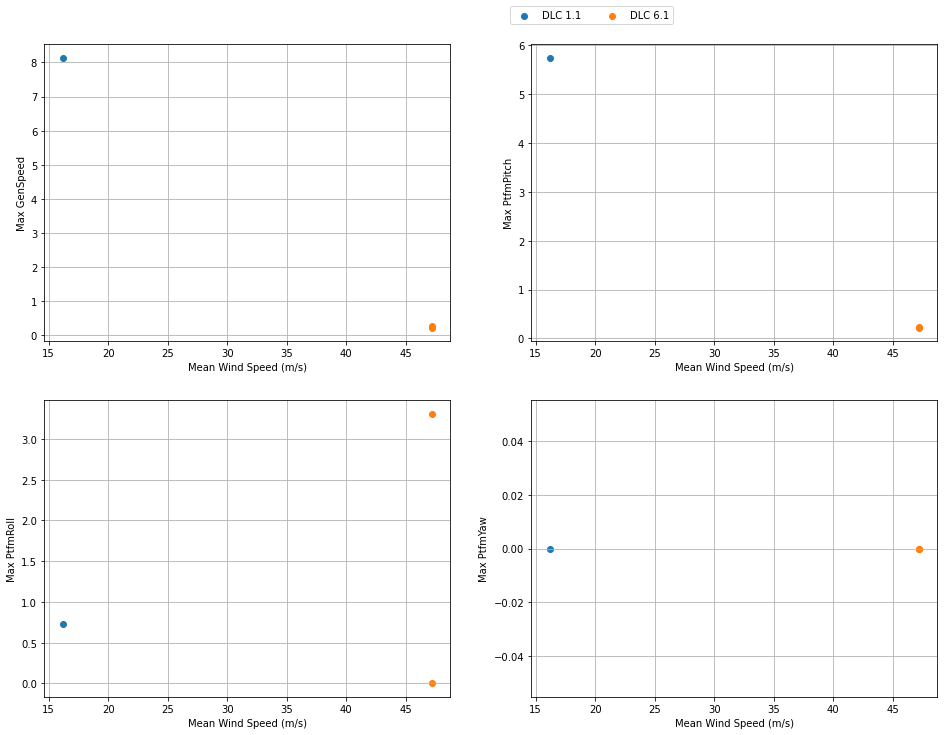

In [11]:
dlcs = cm[('DLC','Label')].unique()
dlc_labs = [f'DLC {num}' for num in dlcs]


channels = ['GenSpeed','PtfmPitch','PtfmRoll','PtfmYaw']


# fig, axs = plt.subplots(len(channels),1)
fig, axs = plt.subplots(2,2)
axs = axs.flatten()
fig.set_size_inches(16,3*len(channels))



for i_chan, chan in enumerate(channels):

    for i_dlc, dlc in enumerate(dlcs):

        dlc_ind = cm[('DLC','Label')] == dlc
        axs[i_chan].scatter(
            ss.reset_index()['Wind1VelX']['mean'].to_numpy()[dlc_ind],
            ss.reset_index()[chan]['max'].to_numpy()[dlc_ind],
            label=dlc_labs[i_dlc]
        )
        axs[i_chan].grid()
        axs[i_chan].set_xlabel('Mean Wind Speed (m/s)')
        axs[i_chan].set_ylabel(f'Max {chan}')
        axs[i_chan].grid(True)


# axs[0].plot([0,30],[1.3*7.56,1.3*7.56],'k--')
# [a.set_xlim([3,28]) for a in axs]

fig.legend(
    [f'DLC {d}' for d in dlcs],
    ncol=3,
    loc='upper right', bbox_to_anchor=(.675, .93)
)

# [a.grid() for a in axs]

# Plotting

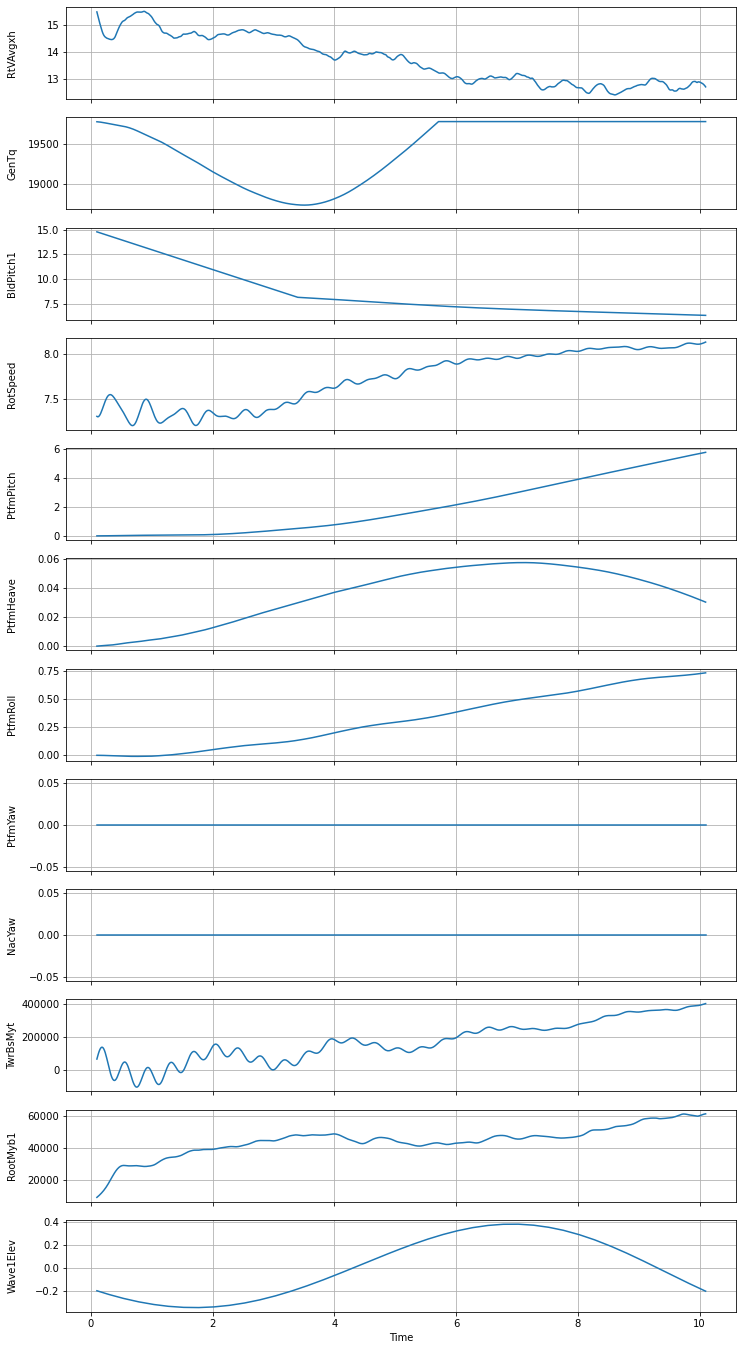

In [12]:

ts1 = pd.read_pickle('outputs/iteration_1/timeseries/IEA15_0.p')
# ts2 = pd.read_pickle('outputs/iteration_1/timeseries/IEA15_1.p')
channels = ['RtVAvgxh','GenTq','BldPitch1','RotSpeed','PtfmPitch','PtfmHeave','PtfmRoll','PtfmYaw','NacYaw','TwrBsMyt','RootMyb1','Wave1Elev']

fig,axs = plot_tss([ts1],channels)

# [a.set_xlim([200,300]) for a in axs]